In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pprint as pp
import scipy.stats as st

# Localização Arquivos
Existe uma pasta raiz e duas pastas nós, onde em uma temos o notebook e na outra a base de dados a ser carregada <br>
Ao rodar a celula abaixo o sistema volta um nível e acessa a pasta dados para carregar a base de dados

In [2]:
#Configurando a pasta de dados
os.chdir('..')
path = os.path.join(os.getcwd(),'Dados')

#Criando DataFrame e vendo primeiros elementos
titanic = pd.read_csv( os.path.join(path,'titanic_data.csv'))

## Descrição retirada do site Kaggle sobre os campos/variáveis

<td><table style="width:100%" >
    <tr border: 1px solid>
        <th>VARIABLE</th>
        <th>DESCRIPTIONS:</th>
    </tr>
    <tr>
        <td>survival
        </td>
        <td>Survival <br>
                (0 = No; 1 = Yes)
        </td>
    </tr>
<tr>
<td>pclass</td>          <td>Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)</td>
<tr>
<td>name</td>            <td>Name</td></tr>
<tr>
<td>sex</td>             <td>Sex</td></tr>
<tr>
<td>age</td>             <td>Age</td></tr>
<tr>
<td>sibsp</td>           <td>Number of Siblings/Spouses Aboard</td></tr>
<tr>
<td>parch</td>           <td>Number of Parents/Children Aboard</td></tr>
<tr>
<td>ticket</td>          <td>Ticket Number</td></tr>
<tr>
<td>fare</td>            <td>Passenger Fare</td></tr>
<tr>
<td>cabin</td>           <td>Cabin</td></tr>
<tr>
<td>embarked</td>        <td>Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)</td></tr>

<font color=blue size=5>Perguntas tratadas nesse projeto</font>
<ol>
    <li>Análise de dados perdidos:<br>Quais campos devem desconsiderados ou tratados para utilizar as informações que guardam?</li>
    <li>Análise da quantidade de sobreviventes e desaparecidos pela sua idade:<br>Como a variável sobrevivente se comporta com relação a idade?</li>
    <li>Análise de sobreviventes por gênero:<br>Como a variável sobrevivente se comporta com relação ao gênero?</li>
    <li>Análise sobre a idade e gênero:<br>Como a variável sobrevivente se comporta com relação a gênero e idade?</li>
    <li>Análise de sobreviventes por classe:<br>Como a classe afeta a variável de sobrevivência?</li>
    <li>Análise de sobreviventes por classe e gênero:<br>Como a classe e gênero afetam a sobrevivência e qual a sua representabilidade estatística?</li>
    <li>Análise da idades do tripulantes:<br>Qual a média e quartis da idade dos passageiros.</li>
</ol>

## Análise de dados perdidos
Verficar se existem dados perdidos e em quais campos isso ocorre

In [3]:
#Verificar se existe missing data e em quais campos ocorrem
teste = lambda x:set(x.isnull())

CamposDadosPerdidos = []
for i in titanic:
    if True in teste(titanic[i]):
        CamposDadosPerdidos.append(i)

print 'Campos que possuem dados perdidos' 
CamposDadosPerdidos

Campos que possuem dados perdidos


['Age', 'Cabin', 'Embarked']

In [4]:
#Mostrar a quantidade de dados perdidos para campo determinado
total = len(titanic)
aux_series = pd.Series(100*(1-(titanic[CamposDadosPerdidos].count()/total).round(3)),index=CamposDadosPerdidos)

for i in CamposDadosPerdidos:
    print '{} para {} são: {}% dos dados estão perdidos.'.format('Registros com NaN',i,aux_series[i])

#Sempre deleto as variáveis que só tem função na célula
%reset_selective -f age,cabin,embarked,total,aux_series

Registros com NaN para Age são: 19.9% dos dados estão perdidos.
Registros com NaN para Cabin são: 77.1% dos dados estão perdidos.
Registros com NaN para Embarked são: 0.2% dos dados estão perdidos.


<font color=red>Deletando a variável Cabin</font> <br>
Como a maior parte dos dados de Cabin estão perdidos o que será retirado de qualquer análise

In [5]:
titanic.drop('Cabin',axis=1).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<font color=red>Deletando a variável Age e guardando idades em nova variável</font> <br>
Como parte das idades foram perdidas é necessário tratar esse caso. Uma variável é criada copiando o dataframe titanic, mas retirando todas as labels que contém dados Nan na variável Age <br>
titanic_age será utilizado sempre que irei trabalhar com idades

In [6]:
titanic_age = titanic.copy().dropna(axis=0,subset=['Age'],how='any')
titanic.drop('Age',axis=1)
titanic_age.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Conclusões
A maioria dos dados que associam passageiros e cabine estão perdidos e assim está variável é pouco representativa.<br>
Faltam 20% das idades dos passageiros e estes dados devem ser <font color=red>desconsiderados</font> ao se trabalhar com análises que envolvam idades, assim foi criada o dataframe titanic_age com as idades tratadas. <br>
A variável Embarked está bem estabelecida.

## Análise da quantidade de sobreviventes e desaparecidos pela sua idade
### Objetivo
Através da análise gráfica ver como se distribuem os sobreviventes e desaparecidos pelas faixas de idade e se existem faixas com maior ou menor taxa de sobrevivência.

In [7]:
def F_FiltroIdade(coluna,criterio):
    '''Função filtra os dados retirando todas as linhas onde a idade é NaN
    Args:
        coluna(string): nome do campo a ser filtrado
        criterio(string): critério para incluir as linhas do dataframe
    Return:
        Pandas Series: Dados filtrados da coluna escolhida'''
    return titanic_age[coluna]==criterio

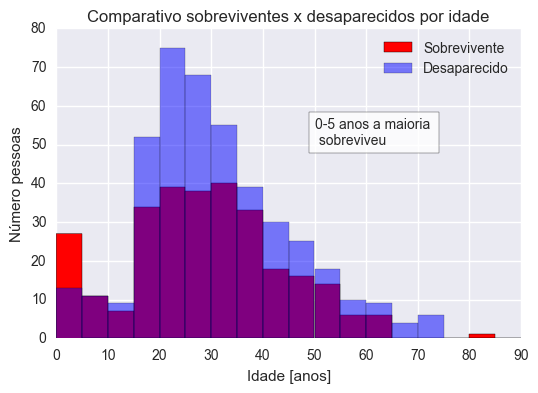

In [8]:
%matplotlib inline

fig,hist = plt.subplots(sharex=True)

'''Criando filtros para passageiros que sobreviveram ou desapareceram e retirando
    as os passageiros que não possuem idade no cadastro'''
filtro_survived = F_FiltroIdade('Survived',1)
filtro_not_survived = F_FiltroIdade('Survived',0)

titanic_age['Age'].loc[filtro_survived].hist(bins=range(0,90+1,5),range =(0,90),color='red')
titanic_age['Age'].loc[filtro_not_survived].hist(bins=range(0,90+1,5),range =(0,90),color='blue',alpha=.5)

plt.text(y=50,x=50,s=u'0-5 anos a maioria \n sobreviveu',bbox=dict(facecolor='white', alpha=.8))
hist.legend(['Sobrevivente','Desaparecido'])
plt.title(u'Comparativo sobreviventes x desaparecidos por idade')
plt.xlabel(u'Idade [anos]')
plt.ylabel(u'Número pessoas')

plt.show()

%reset_selective -f filtro_not_survived,filtro_survived,fig,hist

### Conclusão
Vemos pelo gráfico que a maioria das pessoas entre 0-5 anos sobreviveu assim como o mais velho. <br>
Vemos que a maior parte dos passageiros entre 0-10 sobreviveu, enquanto nas demais faixas a maioria desapareceu.
O passageiro(a) mais velho também sobreviveu. <br>
A ordem de desembarque de um navio em caso de emergência é mulheres em crianças primeiro, logo será interesse realizar essa análise.
<font color=#cc0000>Essa análise sofre a limitação da perda de informação sobre as idades perdidas (aproximadamente 20%), como não sabemos quais foram as idades perdidas não sabemos o real formato do gráfico acima, assim estamos <strong>supondo</strong> que as idades perdidas se distribuem igualmente nas faixas do histograma.</font>

## Análise de sobreviventes por gênero
### Objetivo:
Essa análise quebra a agrupamento realizado na análise anterior para entender por gênero ao invés de idade qual o qual grupo (homens x mulheres) teve mais sobreviventes. <br>
A regra de desembarque em caso de emergência estabelece que mulheres e crianças são os primeiros a deixar o barco e podemos ver se o gráfico evidência esse regra.

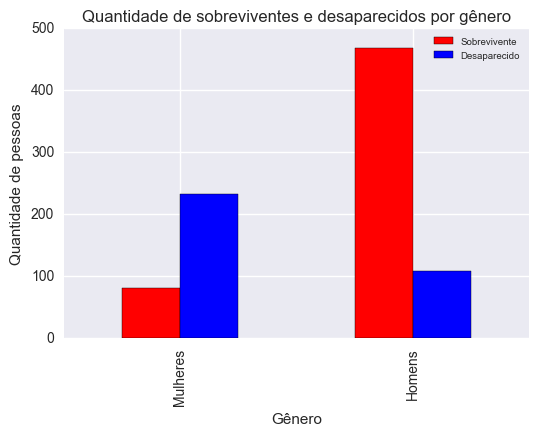

In [9]:
bar = titanic.groupby(['Sex','Survived']).size().unstack().plot.bar(color=['red','blue'])
bar.legend([u'Sobrevivente',u'Desaparecido'],fontsize=u'x-small')
bar.set_xticklabels([u'Mulheres',u'Homens'])
bar.set_xlabel(u'Gênero')
bar.set_ylabel(u'Quantidade de pessoas')
bar.set_title(u'Quantidade de sobreviventes e desaparecidos por gênero')

### Conclusão
Pelo gráfico temos que a maioria dos homens morreram, ao contrário das mulheres onde a maioria sobreviveu. Não temos como saber se a regra de desembarque em caso de emergência foi utilizada, mas temos claramente que as mulheres foram o gênero com maior taxa de sobrevivência. <br><br>
Isso é uma suposição, pois deveríamos realizar algum teste estatístico para entender se dentro de um intervalo de confiança o que está sendo observado nos gráficos está associado a variabilidade natural dos dados.

<font color=blue>Observação</font> <br>
Pelas duas análises anteriores temos duas tendências de sobrevivência para idade e gênero. <br>
Podemos analisar como a idade e gênero impactam na expectativa de sobrevivência.

## Análise sobre a idade e gênero

### Introdução
Essa análise tem como objetivo aprofundar as anteriores, onde vimos a distribuição dos sobreviventes por idade e depois por gênero. <br>
No gráfico (Comparativo sobreviventes x desaparecidos por idade) anterior vemos que entre 15 e 35 anos uma proporção muito grande de pessoas desapareceu e no gráfico seguinte vemos que a maioria dos homens desapareceu, então seria possível que a idade dos homens se concentre nessa faixa de 15-35?
### Objetivo
Analisar a distribuição de sobreviventes por gênero e idade.

In [10]:
def F_FiltroSexSurvived(genero=None,survive=None):
    '''
        Função simples, usada para ajudar a selecionar dados das variáveis Sex e Survived
        Args:
            genero: male or female
            survive: booleano
        Return: Pandas series com campo Age filtrado por Sex, Survived e excluídas as idades perdidas
    '''
    if genero==None and survive==None:
        return None
    elif genero==None:
        return titanic_age['Age'].loc[titanic_age['Survived']==survive]
    elif survive==None:
        return titanic_age['Age'].loc[titanic_age['Sex']==genero]
    else:
        return titanic_age['Age'].loc[(titanic_age['Sex']==genero) & (titanic_age['Survived']==survive)]

In [11]:
def S_CriarHist(plt_array,dados,cor,alpha):
    '''rotina para agilizar a chamada dos histogramas
        Args:
            plt_array: Objecto gráfico
            dados: Pandas Series a ser plotado
            alpha: Transparência do gráfico
        Return: sem retorna
    '''
    plt_array.hist(dados,bins=set_bins,color=cor,alpha=alpha)

In [12]:
def S_TextoBarPlot(graph,hist_data,texto):
    '''rotina adicionar texto nos gráficos
        Args:
            graph: Objecto gráfico
            hist_data: array de posições de cada Bin do histograma
            texto: temos a ser escrito sobre cada Bin
        Return: sem retorno
    '''
    graph.arrow(hist_data[1][10]+3,hist_data[0][1][10]+3,20,20, head_width=2, head_length=2, fc='k', ec='k')
    graph.text(hist_data[1][10]+26,hist_data[0][1][10]+26,s=u'Proporção sobreviventes',bbox=dict(facecolor='white', alpha=1))
    for i in range(0,len(texto)):
        graph.text(x=hist_data[1][i],y=hist_data[0][1][i]+1,s=texto[i],fontsize=7)
 

In [13]:
def S_GerarGrafGenero(set_plot,genero,titulo,legenda):
    '''rotina adicionar texto nos gráficos
        Args:
            graph: Objecto gráfico
            hist_data: array de posições de cada Bin do histograma
            texto: temos a ser escrito sobre cada Bin
        Return: sem retorno
    '''
    
    set_plot.set_title(titulo)
    S_CriarHist(set_plot,F_FiltroSexSurvived(genero,1),'red',1)
    S_CriarHist(set_plot,F_FiltroSexSurvived(genero,0),'blue',.5)
    set_plot.legend(legenda)

(<matplotlib.text.Text at 0xb8bb6d8>, <matplotlib.text.Text at 0xba8ca58>)

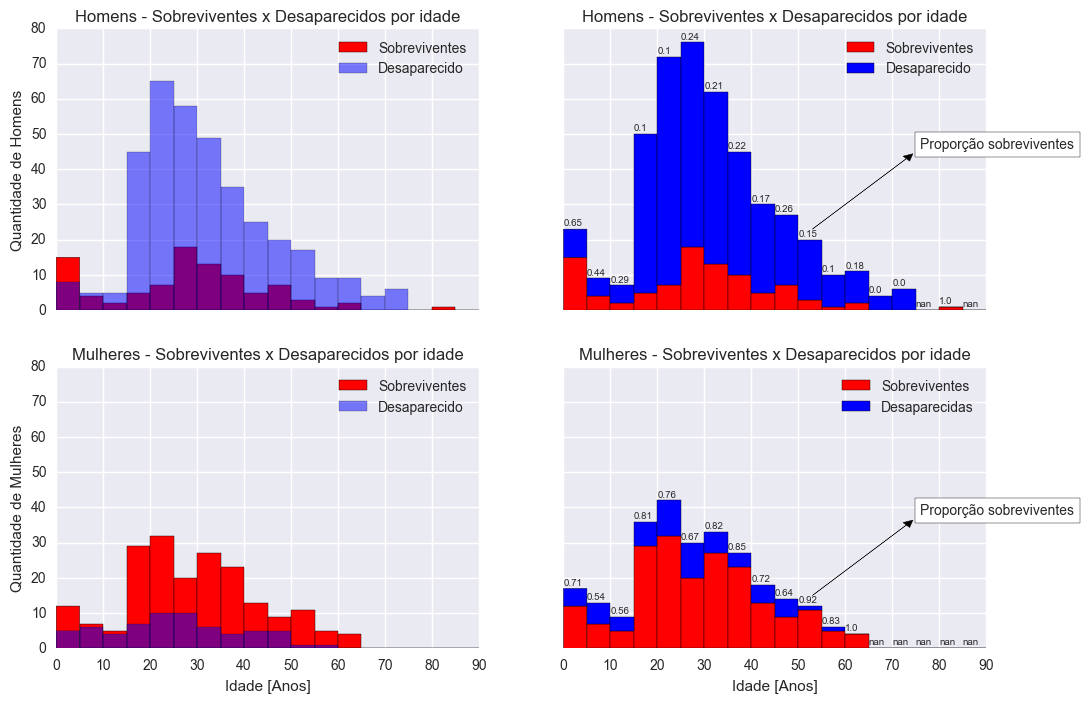

In [14]:
#Serão construídos gráficos separados por gênero, mas dividindo as mesmas dimensões x e y para facilitar a comparação
f, set_plot = plt.subplots(2,2, sharex=True,sharey=True)
f.set_figheight(8),f.set_figwidth(12)
set_bins=np.arange(0,90+1,5)
    
#Gráfico para os homens
genero = 'male'
titulo = u'Homens - Sobreviventes x Desaparecidos por idade'
legenda=['Sobreviventes','Desaparecido']
S_GerarGrafGenero(set_plot[0,0],'male',titulo,legenda)

#Gráfico empilhado homens
set_plot[0,1].set_title(u'Homens - Sobreviventes x Desaparecidos por idade')
hist_data = set_plot[0,1].hist([F_FiltroSexSurvived(genero,1),F_FiltroSexSurvived(genero,0)],rwidth='scalar',histtype='barstacked',bins=set_bins,color=['red','blue'])
set_plot[0,1].legend(['Sobreviventes','Desaparecido'])

#Adicionar texto sobre as barras
taxa_homens = (hist_data[0][0]/hist_data[0][1]).round(2)
S_TextoBarPlot(set_plot[0,1],hist_data,taxa_homens)

#Gráfico para os mulheres
genero = 'female'
titulo = u'Mulheres - Sobreviventes x Desaparecidos por idade'
legendas = ['Sobreviventes','Desaparecidas']
S_GerarGrafGenero(set_plot[1,0],'female',titulo,legenda)

#Gráfico empilhado para mulheres
set_plot[1,1].set_title(u'Mulheres - Sobreviventes x Desaparecidos por idade')
hist_data = set_plot[1,1].hist([F_FiltroSexSurvived(genero,1),F_FiltroSexSurvived(genero,0)],rwidth='scalar',histtype='barstacked',bins=set_bins,color=['red','blue'])
set_plot[1,1].legend(['Sobreviventes','Desaparecidas'])

#Adicionar texto sobre as barras
taxa_mulheres = (hist_data[0][0]/hist_data[0][1]).round(2)
S_TextoBarPlot(set_plot[1,1],hist_data,taxa_mulheres)

#Labels
set_plot[1,0].set_xlabel(u'Idade [Anos]'),set_plot[1,1].set_xlabel(u'Idade [Anos]')
set_plot[0,0].set_ylabel(u'Quantidade de Homens'),set_plot[1,0].set_ylabel(u'Quantidade de Mulheres')

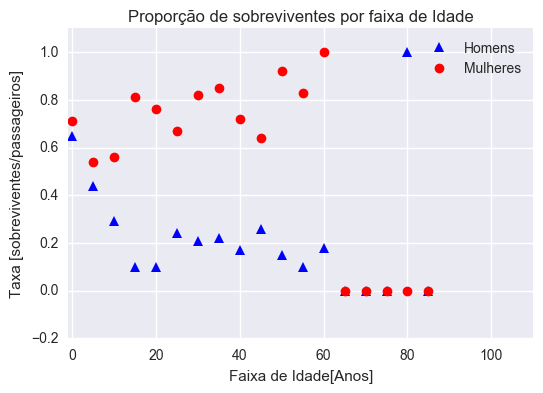

In [15]:
#Colocando em evidênci a proporção de sobreviventes

fig, gp = plt.subplots()

taxa_homens[np.isnan(taxa_homens)]=0
taxa_mulheres[np.isnan(taxa_mulheres)]=0

gp.plot(hist_data[1][0:len(hist_data[1])-1],taxa_homens,'g^',color='blue')
gp.plot(hist_data[1][0:len(hist_data[1])-1],taxa_mulheres,'go',color='red')
gp.set_ylim([-.2,1.1])
gp.set_xlim([-1,110])
legend = gp.legend(['Homens','Mulheres'])
gp.set_xlabel('Faixa de Idade[Anos]')
gp.set_ylabel('Taxa [sobreviventes/passageiros]')
gp.set_title(u'Proporção de sobreviventes por faixa de Idade')

### Conclusão
A idade dos homens realmente se concentra na faixa de 15-35, mas as mulheres também se concentram nessa mesma faixa. <br> 
Pelo gráfico podemos <strong>supor</strong> que a distribuição de sobreviventes no caso das mulheres não sofre grandes variações em todas as faixas, mas chama a atenção que a taxa de sobrevivência seja menor de 5-15 anos, pois em teoria as crianças estão entre as primeiras a serem retiradas em caso de emergência. <br>
Para os homens a taxa de sobrevivência se aproxima da taxa observada nas mulheres somente para os mais jovens nas demais faixas é baixa a taxa de sobrevivência, principalmente entre os mais velhos o que é o inverso do observado nas mulheres.<br><br>
Como não estou utilizando nenhum teste estatísticos, não temos uma intervalo de confiança para garantir que estas variações não  estão associadas a variabilidade dos dados.<br><br>
<font color=#cc0000>Essa análise sofre a limitação da perda de informação sobre as idades perdidas (aproximadamente 20%), como não sabemos quais foram as idades perdidas não sabemos o real formato dos gráficos acima, assim estamos <strong>supondo</strong> que as idades perdidas se distribuem igualmente sobre sobreviventes e gênero.</font>

## Análise de sobreviventes por classe
### Objetivo
Entender se classe na qual está o passageiro afeta a chance de sobrevivência.

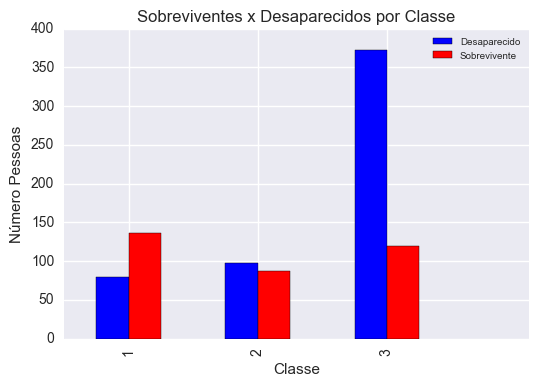

In [16]:
gp =titanic.groupby(['Pclass','Survived'])['Survived'].count().unstack().plot.bar(color = ['blue','red'])
gp.legend(['Desaparecido','Sobrevivente'],fontsize=7)
gp.set_xlim((-.5,3.1))
gp.set_title(u'Sobreviventes x Desaparecidos por Classe')
gp.set_xlabel(u'Classe')
gp.set_ylabel(u'Número Pessoas')

### Conclusão
No gráfico vemos que a classe pode ser fator de sobrevivência para a classe 3. Para as classes 1 e 2 não temos como saber se a diferença está simplesmente associada a chance.<br><br>
Um teste estatístico pode confirmar se dentro de um intervalo de confiança a taxa de sobrevivência de cada classe é menor, igual ou maior ao observado na população.

## Análise de sobreviventes por classe e gênero
### Introdução
Pelas análises anteriores temos que o gênero e a idade tem impacto sobre a chance de sobrevivência, por isso podemos entender se, por exemplo, a terceira classe tiver uma proporção maior de homens isso irá refletir em uma taxa de sobrevivência menor.
### Objetivo
Analisar a proporção de pessoas por gênero e idade em cada classe.

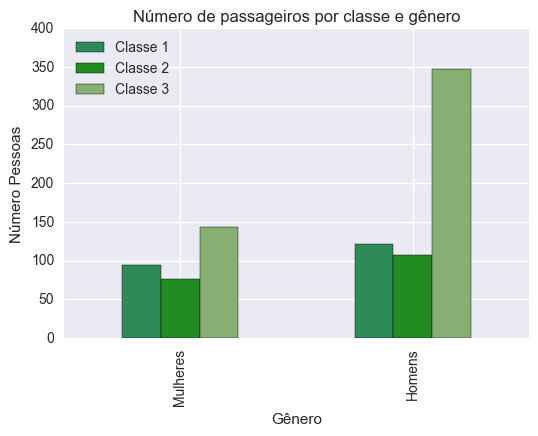

In [17]:
bar = titanic.groupby(['Sex','Pclass'])['Survived'].count().unstack().plot.bar(color = ['seagreen','forestgreen','sage'])
bar.set_ylim([0,400])
bar.legend(['Classe 1','Classe 2','Classe 3'],loc='best')
bar.set_xticklabels(['Mulheres','Homens'])
bar.set_xlabel(u'Gênero')
bar.set_ylabel(u'Número Pessoas')
bar.set_title(u'Número de passageiros por classe e gênero')

Agora vamos analisar os dados através de um teste estatístico

$z_{statistics} = \frac{(Média \ Amostra) - (Média \ População)}{\frac{\sigma}{\sqrt{(tamanho \ amostra)}}}$, onde <br>
$\sigma$ é o desvio da população (passageiros homens/mulheres do Titanic) <br>
Estratificando os dados em homens e mulheres e aplicando o teste Z sobre as amostras (classes) determinamos para um intervalo de confiança de 95% se a média das amostras fazem parte da população.

In [18]:
def F_ZStatistic(genero):
    '''Função para calcular o z-score de cada classe
        Args:
            genero: 'male' ou 'female'
        Return: z-score genero e classe
    '''
    pop_mean = titanic.groupby(['Sex'])['Survived'].mean()[genero]

    #Tamanho da amostra - quantidade de pessoas em cada amostra
    sample_n = titanic.groupby(['Sex','Pclass'])['Survived'].count()[genero]

    #Desvio da população
    pop_std = titanic.groupby(['Sex'])['Survived'].std(ddof=0)[genero]

    #Média de cada amostra
    sample_mean = titanic.groupby(['Sex','Pclass'])['Survived'].mean()[genero]

    #Standard error
    standard_error = pop_std/np.sqrt(sample_n)

    return pd.Series(data=np.array((sample_mean - pop_mean)/standard_error),index=['Classe 1','Classe 2','Classe 3'])

In [19]:
def S_VisualizarTestet(gp,z_statistics,CI,direcao='direita',titulo=None, xlabel=None,ylabel=None):
    '''Rotina para gerar gráficos
        Args:
            gp: Objeto gráfico
            z_statistics: Z-Score calculado de uma amostra
            CI: Intervalo de confiança, entre 0 e 1
            direcao: 'esquerda' ou 'direita', local da zona crítica
            titulo: título no gráfico
            xlabel: título no eixo x
            ylabel: título no eixo y
        Return: void
    '''
    x = np.arange(-5,5,0.1)
    normal = st.norm.pdf(x)
    z_critical = st.norm.ppf(CI)
    
    if direcao == 'direita':
        x_critical = np.arange(z_critical,5,0.1)
    elif direcao=='esquerda':
        x_critical = np.arange(-5,-z_critical,0.1)
    
    y_critical = st.norm.pdf(x_critical)

    gp.plot(x,normal)
    gp.fill_between(x_critical,y_critical,color='red')


    gp.axvline(z_statistics,ymin=0,ymax=.25,color='darkgreen')
    gp.text(x=z_statistics,y=.10,s='Z-Statistics',bbox=dict(facecolor='white', alpha=1))
    gp.legend([u'Distribuição Normal Padrão',u'Z calculado',u'Área crítica'],loc='best',fontsize=7)
    gp.set_title(titulo)
    gp.set_xlabel(xlabel)
    gp.set_ylabel(ylabel)

In [20]:
def S_CriarTestePlot(genero,sex,direcao):
    '''Rotina que chama as demais rotinas e cria 3 gráficos com o z-statistics calculado
        Args:
            genero: escreve se é homen ou mulher nos gráficos
            sex: 'male' ou 'female' para filtrar dados em titanic
            direcao: 'direita' ou 'esquerda' para determinar direçãodo teste estatítico
        Return: sem retorno
    '''
    
    #Calculando valores para cada classe
    z_statistic = F_ZStatistic(sex)

    fig, gp = plt.subplots(2,2,sharex=True,sharey=True)
    fig.set_figheight(8),fig.set_figwidth(12)
    fig.suptitle(u'Teste Z aplicado sobre amostras (classes) para {} - Probabilidade de Sobrevivência'.format(genero),\
                 fontsize=12,color='blue')

    titulo, xlabel,ylabel=u'{}- Z test para Classe {}'.format(genero,1),u'Z-Scores',u'Probabilidade Sobrevivência'
    S_VisualizarTestet(gp[0,0],z_statistics=z_statistic['Classe 1'],CI=.95,direcao=direcao['Classe 1'],titulo=titulo, xlabel=xlabel,ylabel=ylabel)

    titulo, xlabel,ylabel=u'{}- Z test para Classe {}'.format(genero,2),u'Z-Scores',u'Probabilidade Sobrevivência'
    S_VisualizarTestet(gp[0,1],z_statistics=z_statistic['Classe 2'],CI=.95,direcao=direcao['Classe 2'],titulo=titulo, xlabel=xlabel,ylabel=ylabel)

    titulo, xlabel,ylabel=u'{}- Z test para Classe {}'.format(genero,3),u'Z-Scores',u'Probabilidade Sobrevivência'
    S_VisualizarTestet(gp[1,0],z_statistics=z_statistic['Classe 3'],CI=.95,direcao=direcao['Classe 3'],titulo=titulo, xlabel=xlabel,ylabel=ylabel)

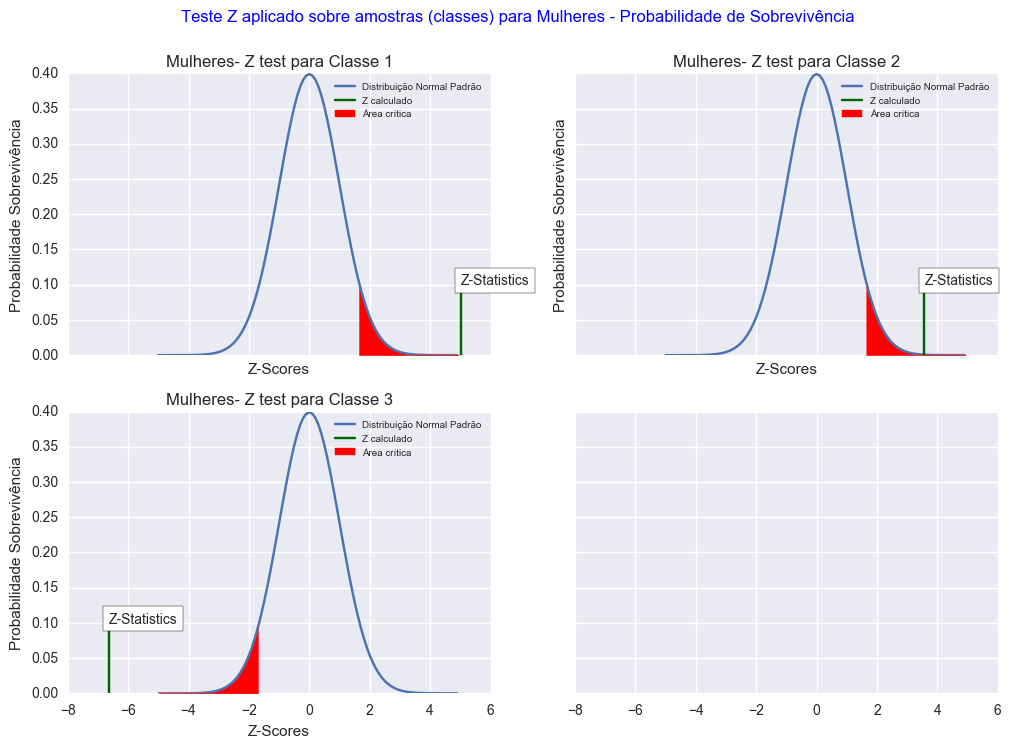

In [21]:
direcoes = pd.Series({'Classe 1':'direita','Classe 2':'direita','Classe 3':'esquerda'})
S_CriarTestePlot('Mulheres','female',direcoes)

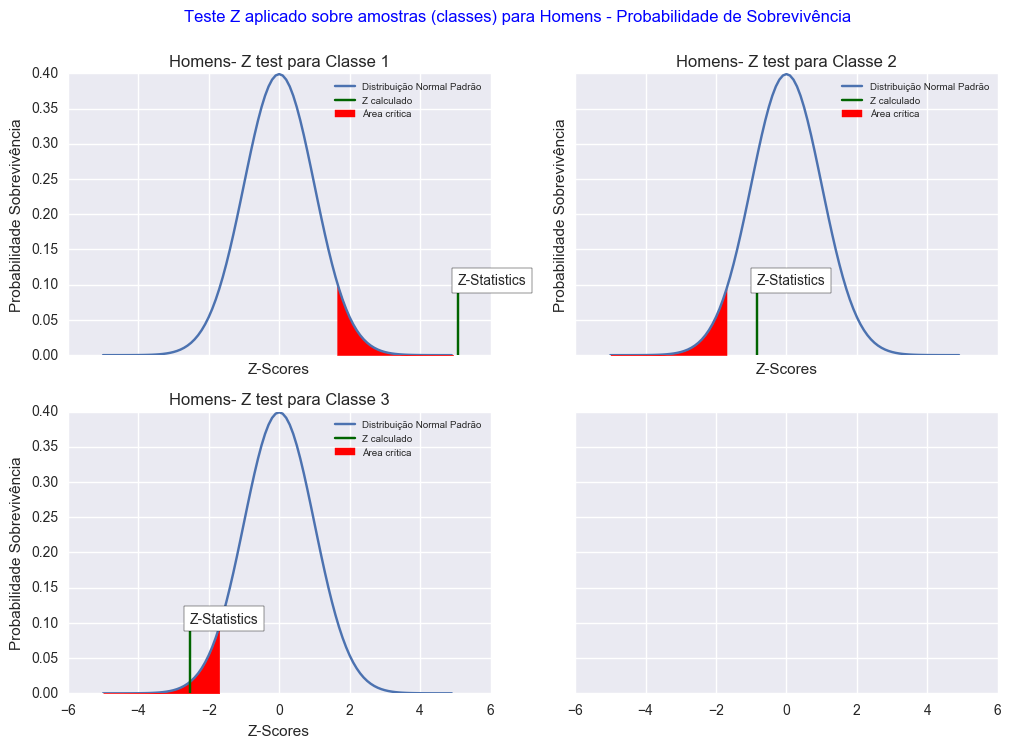

In [22]:
direcoes = pd.Series({'Classe 1':'direita','Classe 2':'esquerda','Classe 3':'esquerda'})
S_CriarTestePlot('Homens','male',direcoes)

### Conclusão

##### Mulheres
Temos que para as amostras (classes) <strong>1</strong> e <strong>2</strong> o gráfico mostra que o Z-Statisics está dentro da região com intervalo de confiança de 95%, ou seja, se tivermos como <strong>hipótese</strong> nula que as mulheres das classes 1 e 2 possuem a mesma probabilidade de sobreviver ou até menor que da da população feminina a hipótese nula seria <strong>rejeitada</strong> e o mesmo ocorreria com as mulheres da classe 3, onde a hipótese nula de que a média de sobrevivência da amostra (classe) seria maior ou igual a da população também seria <strong>rejeitada</strong>. Isso tudo significa que a variação não está associada a chance, logo as mulheres da classe 3 uma probabilidade menor de sobrevivência em relação as da classe 1 e 2.
##### Homens
Para os homens temos uma análise semelhante ao ocorrido com as mulheres, exceto pela amostra (classe) 2, onde a hipótese nula não seria rejeitada e a média da amostra seria igual ou maior a média da população. E isso nos diz que para classe 1 tem maior chance de sobrevivência, classe 2 não podemos afirmar nada e classe 3 tem uma chance de sobrevivência menor que as demais classes.

## Análise da Idade dos tripulantes
### Objetivo 
Analisar a idade dos passageiros

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


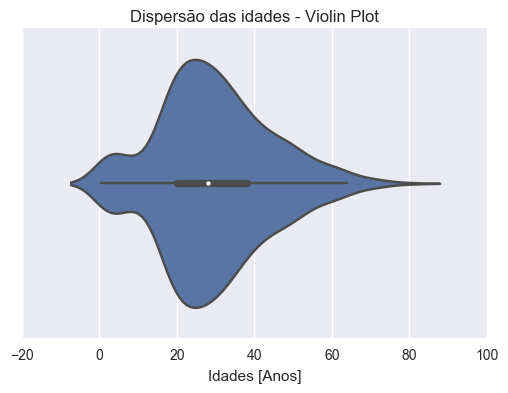

In [23]:
idade = titanic_age['Age']

print(idade.describe())
gp = sns.violinplot(idade)

gp.set_xlabel(u'Idades [Anos]')
gp.set_title(u'Dispersão das idades - Violin Plot')

### Conclusão
Vemos na análise da idade (1D) que as idades se concentram em torno de 28 anos como mostrada do tabela gerada pela função describe().